## Implementing the $k$-NN Classification

* Apply the $k$-NN Algorithm
* Using Cross Validation
* Apply Scaling

In [2]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
from seaborn import plt
from sklearn.datasets import load_iris

load_iris?

In [3]:
# THIS NB IS FOR THE SCALED DATA 
# QUESTION 2 OF LAB

The best data set to validate any classification algorithm's performance is the [Fisher Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set), which is commonly included in any stats or machine learning package.

In [4]:
from matplotlib.colors import ListedColormap # Uses colors on map
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

In [5]:
# Various variables we'll need to set intially.
n_neighbors = range(1, 51, 2) 
# Skipping two; we need it to be odd.
# Choice of K. Number of neighbors. Usually want it to be an odd number to avoid the possibility of a tie.

In [6]:
# Load in the data
iris = datasets.load_iris()
#iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Normalized and Scaled
from sklearn.preprocessing import scale
iris_df = pd.DataFrame(scale(iris.data), columns = iris.feature_names)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.657933e-15,-1.515825e-15,-8.052818e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


### Parameter Search

In [7]:
# Create the training (and test) set using scikit-learn's train_test_split function
#X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)

# Train_test takes data and target
# test_size = 30% for our training set
# random_state = 12 : random number generation has the same seed

# Try this sequence again with the following random seed.
# observe how it changes the scores of K quite dramatically
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=8)

In [8]:
# Loop through each neighbors value from 1 to 51 and append
# the scores
scores = [] # Create empty list
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n) # Number of neighbors
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test)) 

# KN Classifier: deterministic algo
# How well does it predict the other 30% 

In [9]:
# This is for the one below
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)

#plt.figure(figsize=(18,6))
#_ = plt.plot(n_neighbors, scores, linewidth=3.0)

# 11 is the optimal number of neighbors we're classifying by using this particular train set

### Application of Cross Validation

The work above shows that at 11 neighbors, we can get an ideal result that doesn't overfit the data. To verify this, we'll use cross validation.

In [28]:
from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(7, weights='uniform') # Using 11(7 for random_state=8) neighbors
scores = cross_val_score(clf, iris_df.values, iris.target, cv=5) # Feeding a model, cv=5 do five cross validations
# For each of the 5 splits
# Do enough cv so that you have a good model
# The more you cv the more confident you can be that 
print scores

[ 0.96666667  0.96666667  0.93333333  0.9         1.        ]


In [35]:
type(iris_df.values)


numpy.ndarray

In [11]:
np.mean(scores)

0.95333333333333337

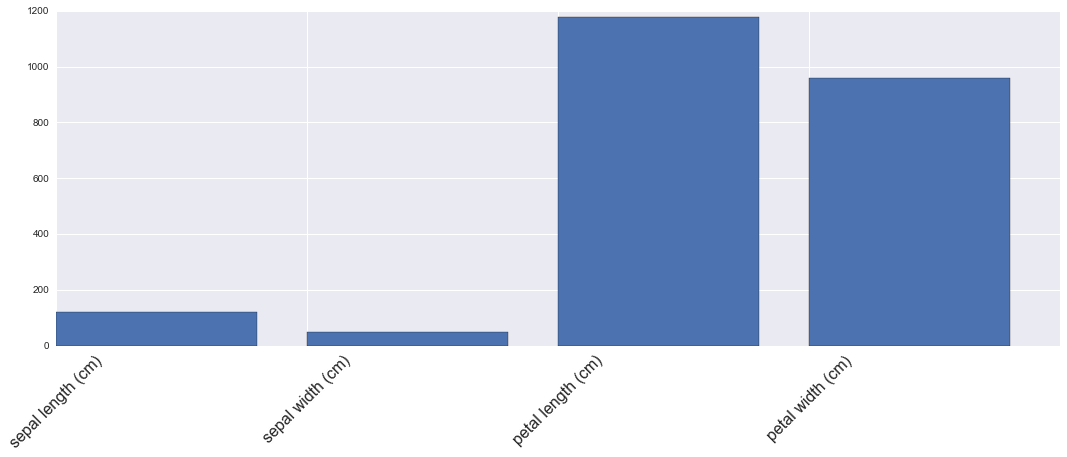

In [12]:
# Below returns highest signifiance for features 2 and 3
# (remember, Python uses index 0). 
n = np.arange(len(iris.feature_names))

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

# Identifies how much each feature contributes to identify that target
# Which feature is most important
# feature_selection
ax.bar(n, feature_selection.f_classif(iris.data, iris.target)[0])

xtickNames = ax.set_xticklabels(iris.feature_names)
ax.set_xticks(n)
_ = plt.setp(xtickNames, rotation=45, fontsize=16)

Fit only the last two features:

In [13]:
clf = neighbors.KNeighborsClassifier(7, weights='uniform')
clf.fit(scale(iris.data[:, 2:4]), iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=7, p=2, weights='uniform')

In [14]:
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [15]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, y_min = iris_df.min()[['petal length (cm)', 'petal width (cm)']]
x_max, y_max = iris_df.max()[['petal length (cm)', 'petal width (cm)']]

In [16]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [17]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

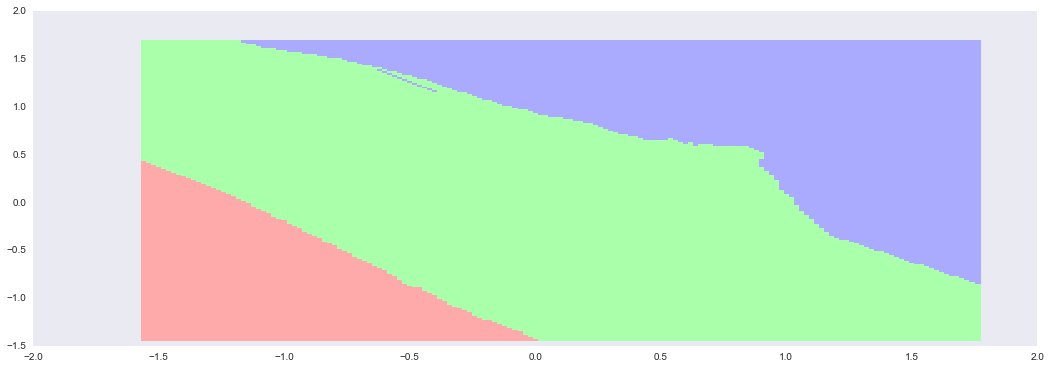

In [18]:
plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

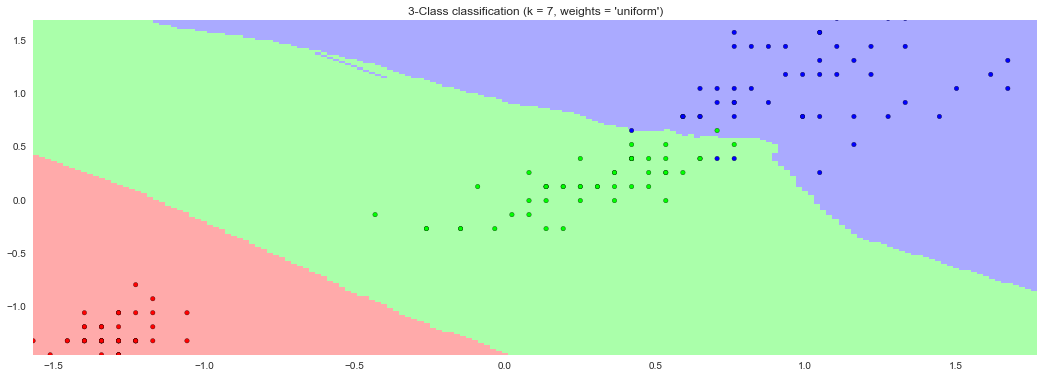

In [19]:
# Plot also the training points
plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris.target, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = {}, weights = '{}')".format(clf.n_neighbors, clf.weights))

### Scaling

In [20]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.657933e-15,-1.515825e-15,-8.052818e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [21]:
from sklearn.preprocessing import scale

In [22]:
df_norm = pd.DataFrame(scale(iris.data), columns=iris.feature_names)

In [23]:
df_norm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [27]:
df_norm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.657933e-15,-1.515825e-15,-8.052818e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [25]:
# Scaling changed the mean and std deviation  
# Vars that had the largest scale were the more diagnostic
# The features with biggest variance are the most important features
# Hence scaling didn't make model better

## Lab

1. Rerun the [parameter search](#Parameter-Search) with `random_state=8`. Do you get the same result for the optimal $k$
2. Rerun the whole lab but using [scaled](#Scaling) data

## Show and Tell